### Experiment1

PID Gain 값
- Ki=0.5
- Kp=15
- Kd=0.5

가속 시간
- Ta_1 = 0.05s

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("Experiment1.csv")

In [3]:
data1

,TIME,Target Y,Actual Y,Following Error
0,0.000000,0.000000e+00,0.0000,0.0000
1,0.000100,0.000000e+00,0.0000,0.0000
2,0.000200,0.000000e+00,0.0000,0.0000
3,0.000300,0.000000e+00,0.0000,0.0000
4,0.000400,0.000000e+00,0.0000,0.0000
...,...,...,...,...
221056,22.106051,-3.030000e-11,-0.0491,0.0491
221057,22.106152,-3.030000e-11,-0.0491,0.0491
221058,22.106251,-3.030000e-11,-0.0491,0.0491
221059,22.106351,-3.030000e-11,-0.0491,0.0491


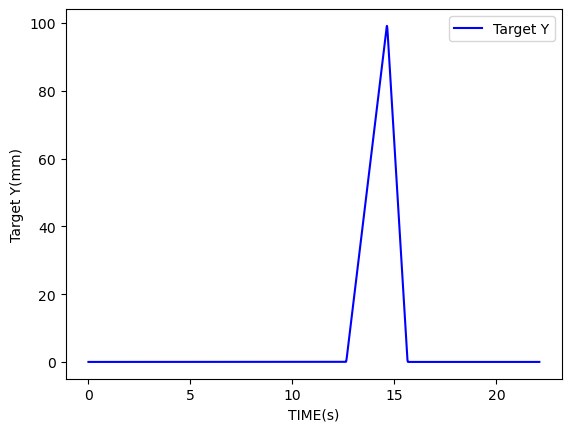

In [21]:
x = data1["TIME"]
y1 = data1["Target Y"]

plt.plot(x, y1, 'b', label = "Target Y")
plt.xlabel("TIME(s)")
plt.ylabel("Target Y(mm)")
plt.legend(loc="best")
plt.show()

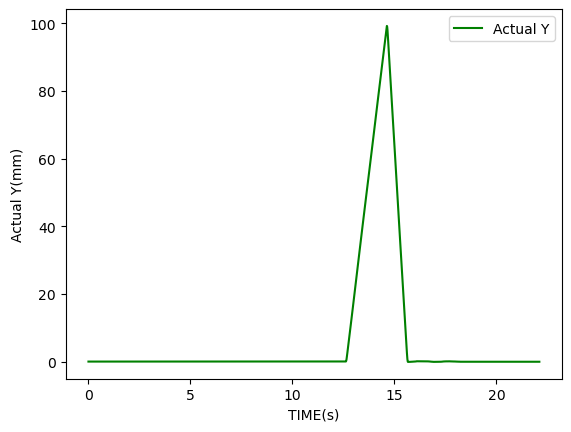

In [22]:
y2 = data1["Actual Y"]
plt.plot(x, y2, 'g', label = "Actual Y")
plt.xlabel("TIME(s)")
plt.ylabel("Actual Y(mm)")
plt.legend(loc="best")
plt.show()

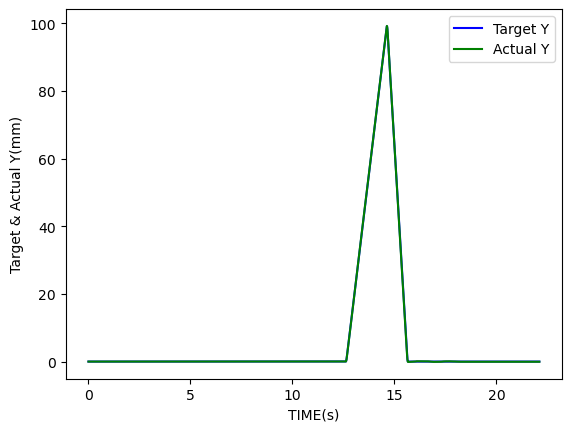

In [23]:
plt.plot(x, y1, 'b', label = "Target Y")
plt.plot(x, y2, 'g', label = "Actual Y")
plt.xlabel("TIME(s)")
plt.ylabel("Target & Actual Y(mm)")
plt.legend(loc="best")
plt.show()

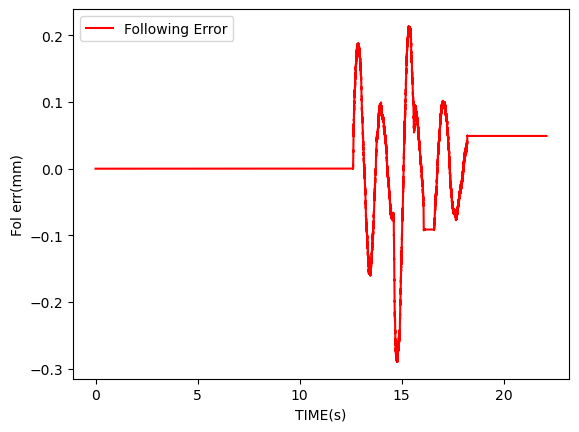

In [24]:
y3 = data1["Following Error"]
plt.plot(x, y3, 'r', label = "Following Error")
plt.xlabel("TIME(s)")
plt.ylabel("Fol err(mm)")
plt.legend(loc="best")
plt.show()

# 분석

In [10]:
print("목표 변위의 최댓값: ", max(y1),"mm")
print("실제 변위의 최댓값: ", max(y2), "mm")

목표 변위의 최댓값:  99.16667 mm
실제 변위의 최댓값:  99.2808 mm


### 목표 변위가 0이고 시간이 15초 보다 작을 때

In [16]:
data1[(data1["Target Y"]==0) & (data1["TIME"]<15)]

,TIME,Target Y,Actual Y,Following Error
0,0.000000,0.0,0.0,0.0
1,0.000100,0.0,0.0,0.0
2,0.000200,0.0,0.0,0.0
3,0.000300,0.0,0.0,0.0
4,0.000400,0.0,0.0,0.0
...,...,...,...,...
126140,12.614226,0.0,0.0,0.0
126141,12.614326,0.0,0.0,0.0
126142,12.614426,0.0,0.0,0.0
126143,12.614526,0.0,0.0,0.0


### => 12.61426초 이후에 이송 시작

---


### 목표 변위가 대략 0이고 시간이 15초 보다 클 때

In [20]:
data1[(data1["Target Y"]>=0) & (data1["TIME"]>15)]

,TIME,Target Y,Actual Y,Following Error
149998,15.000085,63.95500,64.0894,-0.13440
149999,15.000185,63.94500,64.0795,-0.13450
150000,15.000286,63.93500,64.0695,-0.13450
150001,15.000386,63.92500,64.0594,-0.13440
150002,15.000486,63.91500,64.0492,-0.13420
...,...,...,...,...
156638,15.664099,0.00030,-0.0910,0.09130
156639,15.664199,0.00020,-0.0907,0.09090
156640,15.664299,0.00012,-0.0904,0.09052
156641,15.664399,0.00006,-0.0902,0.09026


### => 약 15.6645s 에 목표변위가 0이라고 할 수 있다.

---

### 15.6645초 이후에, 그러니까 모터가 원위치에 도착한 후에도  모터가 진동한다. 
### 그래서 추종오차가 지속적으로 변화하다가 수렴한다. 

### 수렴한 추종 오차 값(Steady state error)는 대략 0.05mm이다.